<a href="https://colab.research.google.com/github/GildasTaliah/Solutions_with_PyNoteBook/blob/main/StatsLearningHA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  Install tidymodels and other packages

install.packages(c("tidymodels", "randomForest", "xgboost"))
install.packages(c("glmnet", "rpart.plot", "vip"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘warp’, ‘future.apply’, ‘iterators’, ‘listenv’, ‘parallelly’, ‘lhs’, ‘DiceDesign’, ‘sfd’, ‘sparsevctrs’, ‘patchwork’, ‘globals’, ‘clock’, ‘gower’, ‘ipred’, ‘timeDate’, ‘furrr’, ‘slider’, ‘doFuture’, ‘foreach’, ‘future’, ‘GPfit’, ‘modelenv’, ‘dials’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’




In [ ]:
## Import important libraries
library(tidyverse)
library(tidymodels)

## Import other Engines
library(rpart)
library(randomForest)
library(xgboost)

## Import visualization libraries
library(rpart.plot)
library(vip)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.8     ✔ rsample      1.3.0
✔ dials        1.4.0     ✔ tune         1.3.0
✔ infer        1.0.8     ✔ workflows    1.2.0
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.3.1     ✔ yardstick    1.3.2
✔ recipes      1.3.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [ ]:
##  Read data into R
data <- read_csv('StudentPerformanceFactors.csv')

## Take a glimpse of the data
glimpse(data)

Rows: 6617 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): Parental_Involvement, Access_to_Resources, Extracurricular_Activit...
dbl  (8): Hours_Studied, Attendance, Sleep_Hours, Awake_Hours, Previous_Scor...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 6,617
Columns: 22
$ Hours_Studied              <dbl> 23, 19, 24, 29, 19, 19, 29, 25, 17, 23, 17,…
$ Attendance                 <dbl> 84, 64, 98, 89, 92, 88, 84, 78, 94, 98, 80,…
$ Parental_Involvement       <chr> "Low", "Low", "Medium", "Low", "Medium", "M…
$ Access_to_Resources        <chr> "High", "Medium", "Medium", "Medium", "Medi…
$ Extracurricular_Activities <chr> "No", "No", "Yes", "Yes", "Yes", "Yes", "Ye…
$ Sleep_Hours                <dbl> 7, 8, 7, 8, 6, 8, 7, 6, 6, 8, 8, 6, 8, 8, 8…
$ Awake_Hours                <dbl> 17, 16, 17, 16, 18, 16, 17, 18, 18, 16, 16,…
$ Previous_Scores            <dbl> 73, 59, 91, 98, 65, 89, 68, 50, 80, 71, 88,…
$ Motivation_Level           <chr> "Low", "Low", "Medium", "Medium", "Medium",…
$ Internet_Access            <chr> "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "…
$ Tutoring_Sessions          <dbl> 0, 2, 2, 1, 3, 3, 1, 1, 0, 0, 4, 2, 2, 2, 1…
$ Family_Income              <chr> "Low", "Medium", "Medium", "Medium", "Mediu…
$ Teacher_Qualit

In [ ]:
#####################********************####################*******************
### Data Exploration + Data Cleaning + Data Pre-processing
### Outlier Removal + Feature Engineering
###
###
#####################********************####################*******************


cat("The Home_Planet column has just one unique value, therefore is redundant, including it will be uninformative to our data analysis and as well\
modelling process.
Dropping duplicates, the 'distinct' function will ensure we keep only unique rows - essentially what is needed across all columns. The 'ExamScore' \
target variable is made to appear first using the 'relocate' function.")
cat("\n")

data <- data  |>
        # Select all except Home_Planet
        select(!c(Home_Planet)) |>
        # Keep only distintct observation
        distinct(.keep_all = TRUE) |>
        # Remove na values
        na.omit() |>
        # Relocate the target variable to first column
        relocate(Exam_Score)

## Replace misspelled words
data$Parental_Involvement <- gsub('MEDium', 'Medium', data$Parental_Involvement)
data$Gender <- gsub('Femael', 'Female', data$Gender)

cat("\n")
cat(" For smooth data analysis and for creating models, we will have qualitative data encoded as factors. For this, I will apply apply the 'as.factor()' \
function across the entire data for columns with character data type. Numeric columns are are already in the desired data type, it is left unchanged")
cat("\n")

## Cast character data type to factor
data <- data |>
        mutate(across(where(is.character), \(x) as.factor(x)) )
summary(data)
cat("Now data is more easy to understand")

The Home_Planet column has just one unique value, therefore is redundant, including it will be uninformative to our data analysis and as well
modelling process.
Dropping duplicates, the 'distinct' function will ensure we keep only unique rows - essentially what is needed across all columns. The 'ExamScore' 
target variable is made to appear first using the 'relocate' function.

 For smooth data analysis and for creating models, we will have qualitative data encoded as factors. For this, I will apply apply the 'as.factor()' 
function across the entire data for columns with character data type. Numeric columns are are already in the desired data type, it is left unchanged


   Exam_Score    Hours_Studied      Attendance     Parental_Involvement
 Min.   :  0.0   Min.   :  1.00   Min.   : 60.00   High  :1816         
 1st Qu.: 65.0   1st Qu.: 16.00   1st Qu.: 70.00   Low   :1273         
 Median : 67.0   Median : 20.00   Median : 80.00   Medium:3230         
 Mean   : 67.2   Mean   : 20.05   Mean   : 80.01                       
 3rd Qu.: 69.0   3rd Qu.: 24.00   3rd Qu.: 90.00                       
 Max.   :101.0   Max.   :100.00   Max.   :100.00                       
 Access_to_Resources Extracurricular_Activities  Sleep_Hours    
 High  :1887         No :2545                   Min.   : 4.000  
 Low   :1260         Yes:3774                   1st Qu.: 6.000  
 Medium:3172                                    Median : 7.000  
                                                Mean   : 7.033  
                                                3rd Qu.: 8.000  
                                                Max.   :10.000  
  Awake_Hours    Previous_Scores  Motivat

Now data is more easy to understand

In [ ]:
##
## Examine target variable
##
summary(data$Exam_Score)
#data |> count(data$Exam_Score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    65.0    67.0    67.2    69.0   101.0 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


We notice how data is very extreme, we handel accoringly

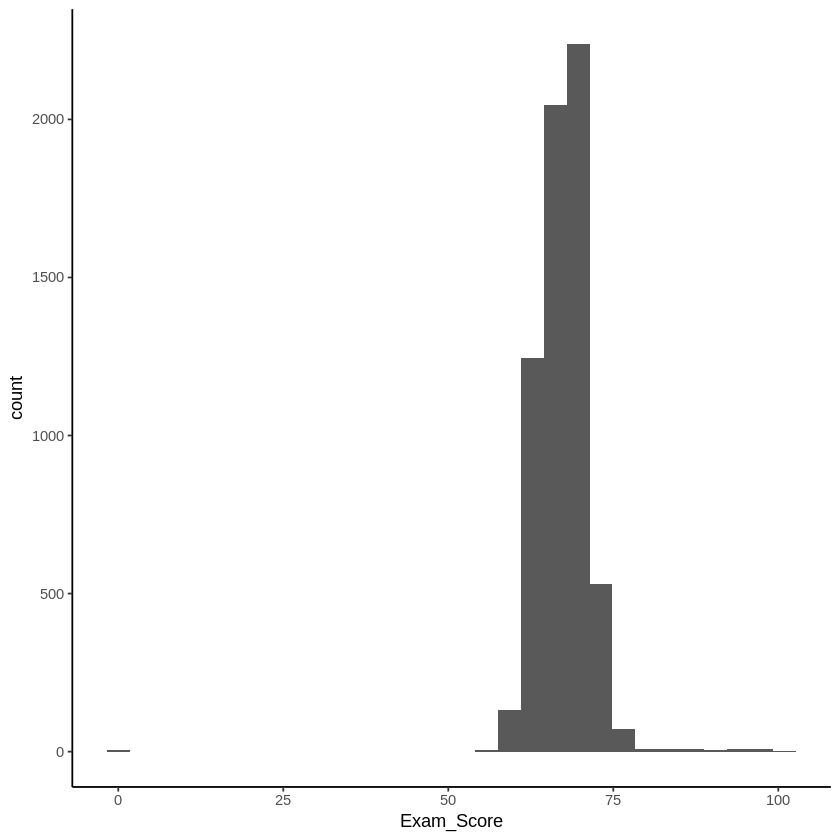

In [ ]:
ggplot(data, aes(x = Exam_Score)) +
  geom_histogram() +
  theme_classic()

cat("We notice how data is very extreme, we handel accoringly")

 For treating outliers, the traditional appraoch is to use Inter Quartile Range approach to remove outliers, as seen from the  displayed hist, 
we have very few outliers, that is we have few extreme data points, and are very extreme. This implies the traditional outlier removal  approach 
involving the IQR, wil throw away a lot data. For this reason, I recon removing just the very extremes values would solve this.
Lower threshold:  59 
 Upper threshold:  86

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


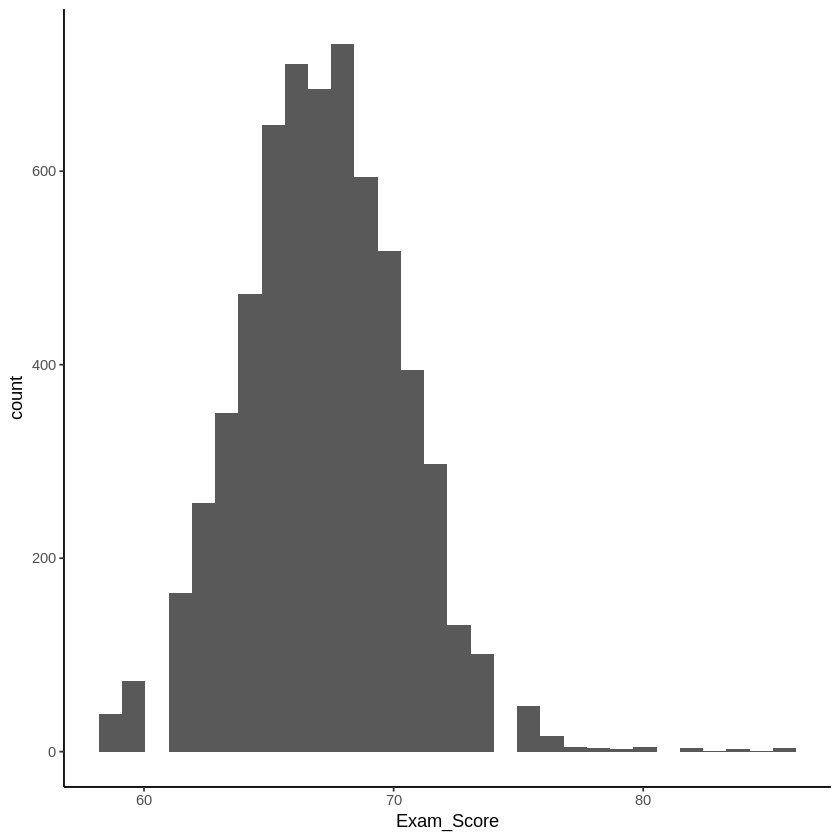

In [ ]:
## Outlier removal
cat(" For treating outliers, the traditional appraoch is to use Inter Quartile Range approach to remove outliers, as seen from the  displayed hist, \
we have very few outliers, that is we have few extreme data points, and are very extreme. This implies the traditional outlier removal  approach \
involving the IQR, wil throw away a lot data. For this reason, I recon removing just the very extremes values would solve this.")
cat("\n")

## The Lower and upper 0.5 % thresholds will be removed
lower_threshold <- quantile(data$Exam_Score, 0.005)

upper_threshold <- quantile(data$Exam_Score, 0.995)
cat('Lower threshold: ', lower_threshold, '\n' ,'Upper threshold: ', upper_threshold)


## Filter data within the thresholds
data <- data |>
  filter(Exam_Score >= lower_threshold & Exam_Score <= upper_threshold)

## Hist after removal
ggplot(data, aes(x = Exam_Score)) +
  geom_histogram() +
  theme_classic()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


Current dimension of the data set:   
 6259 Observations and  21 Variables

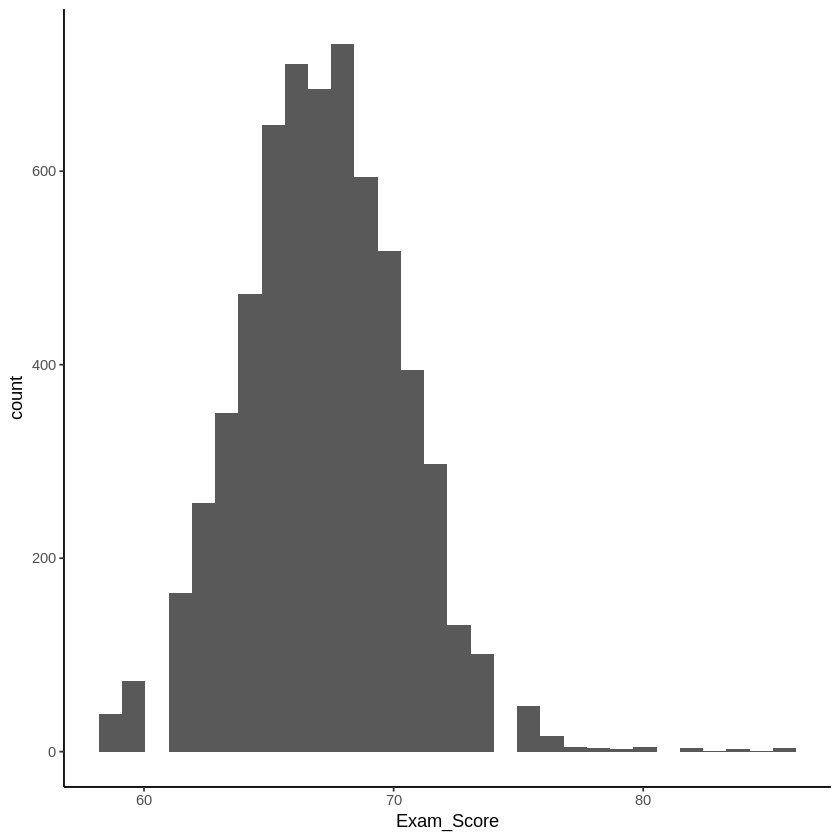

In [ ]:
## Hist after removal
ggplot(data, aes(x = Exam_Score)) +
  geom_histogram() +
  theme_classic()

cat("Current dimension of the data set:  ", '\n',dim(data)[1], 'Observations and ', dim(data)[2], 'Variables')

In [ ]:

# Compute correlation for numeric data
data |> select(where(is.numeric)) |> cor()

cat("\n")
cat("Results shows exam score is (weakly) positively coorrelated with Hours studeied and (strongly) positively correlated with Attendance. Moreover \
hours awake, Prev score, Tutoring and Physical activity are share a (weak) positive linear relationship with students perfromance - Exam_Score.
However, sleep hours is (perhaps surprisingly) (weakly) neagtively correlated. I would think enough sleep helps with studies, but maybe these guys \
overslept and as a result it reduced their time allocated for studying. \
sleep and awake hours share  a perfect negative relationship. This will lead to multi-collinearity, to fix that we engineer a new feature, \
sleep awake ratio, replacing both.  " )
cat("\n")

# Engineer feaature: Sleep Awake ratio
data <- data |>
        mutate(SleepAwake_Ratio = Sleep_Hours  / Awake_Hours)  |>
        # Deselect Sleep_hours and Awake_Hours
        select(-Sleep_Hours, -Awake_Hours)

# Re-Compute correlation
data |> select(where(is.numeric)) |> cor()

## Obtain factor column names
factor_colnames <- data |> select(where(is.factor)) |> names()
factor_colnames

#data[factor_colnames]

,Exam_Score,Hours_Studied,Attendance,Sleep_Hours,Awake_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
Exam_Score,1.000000000,0.450969141,0.644284126,-0.008463445,0.008463445,0.183948911,0.169231279,0.023806460
Hours_Studied,0.450969141,1.000000000,-0.027591244,0.017485566,-0.017485566,0.011224256,-0.020939108,0.000400647
Attendance,0.644284126,-0.027591244,1.000000000,-0.018327024,0.018327024,-0.024036621,0.008453124,-0.027243045
Sleep_Hours,-0.008463445,0.017485566,-0.018327024,1.000000000,-1.000000000,-0.022093969,-0.009691784,-0.003254398
Awake_Hours,0.008463445,-0.017485566,0.018327024,-1.000000000,1.000000000,0.022093969,0.009691784,0.003254398
Previous_Scores,0.183948911,0.011224256,-0.024036621,-0.022093969,0.022093969,1.000000000,-0.016538294,-0.007447314
Tutoring_Sessions,0.169231279,-0.020939108,0.008453124,-0.009691784,0.009691784,-0.016538294,1.000000000,0.015478799
Physical_Activity,0.023806460,0.000400647,-0.027243045,-0.003254398,0.003254398,-0.007447314,0.015478799,1.000000000



Results shows exam score is (weakly) positively coorrelated with Hours studeied and (strongly) positively correlated with Attendance. Moreover 
hours awake, Prev score, Tutoring and Physical activity are share a (weak) positive linear relationship with students perfromance - Exam_Score.
However, sleep hours is (perhaps surprisingly) (weakly) neagtively correlated. I would think enough sleep helps with studies, but maybe these guys 
overslept and as a result it reduced their time allocated for studying. 
sleep and awake hours share  a perfect negative relationship. This will lead to multi-collinearity, to fix that we engineer a new feature, 
sleep awake ratio, replacing both.  


,Exam_Score,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Physical_Activity,SleepAwake_Ratio
Exam_Score,1.000000000,0.450969141,0.644284126,0.183948911,0.169231279,0.023806460,-0.008076085
Hours_Studied,0.450969141,1.000000000,-0.027591244,0.011224256,-0.020939108,0.000400647,0.017410996
Attendance,0.644284126,-0.027591244,1.000000000,-0.024036621,0.008453124,-0.027243045,-0.017273073
Previous_Scores,0.183948911,0.011224256,-0.024036621,1.000000000,-0.016538294,-0.007447314,-0.022622211
Tutoring_Sessions,0.169231279,-0.020939108,0.008453124,-0.016538294,1.000000000,0.015478799,-0.011249983
Physical_Activity,0.023806460,0.000400647,-0.027243045,-0.007447314,0.015478799,1.000000000,-0.002550562
SleepAwake_Ratio,-0.008076085,0.017410996,-0.017273073,-0.022622211,-0.011249983,-0.002550562,1.000000000


[1] "Parental_Involvement"       "Access_to_Resources"       
 [3] "Extracurricular_Activities" "Motivation_Level"          
 [5] "Internet_Access"            "Family_Income"             
 [7] "Teacher_Quality"            "School_Type"               
 [9] "Peer_Influence"             "Learning_Disabilities"     
[11] "Parental_Education_Level"   "Distance_from_Home"        
[13] "Gender"

In [ ]:
# loop through and examine impact of factors on Exam Score
for (col in factor_colnames) {
  summary_result <- data |>
    group_by(!!sym(col)) |>
    summarise(avg_score = mean(Exam_Score))

  print(paste("Summary for", col))
  print(list(summary_result))
  cat("\n")
}

cat("\n")
cat("Looking at first few: the higher the parental involvment the more likely the students perfomance will be high. This also applies to access to resources \
and family income. Gender has zero impact on students expected performance.")
cat("\n")

cat("Time for modelling: \
We are presented with predictors along with a continuos target variable, and our goal is to predict the continuos target variable, the natural selection for such \
a task is a  regression model")

[1] "Summary for Parental_Involvement"
[[1]]
# A tibble: 3 × 2
  Parental_Involvement avg_score
  <fct>                    <dbl>
1 High                      68.0
2 Low                       66.3
3 Medium                    67.0


[1] "Summary for Access_to_Resources"
[[1]]
# A tibble: 3 × 2
  Access_to_Resources avg_score
  <fct>                   <dbl>
1 High                     68.0
2 Low                      66.2
3 Medium                   67.1


[1] "Summary for Extracurricular_Activities"
[[1]]
# A tibble: 2 × 2
  Extracurricular_Activities avg_score
  <fct>                          <dbl>
1 No                              66.9
2 Yes                             67.4


[1] "Summary for Motivation_Level"
[[1]]
# A tibble: 3 × 2
  Motivation_Level avg_score
  <fct>                <dbl>
1 High                  67.7
2 Low                   66.7
3 Medium                67.2


[1] "Summary for Internet_Access"
[[1]]
# A tibble: 2 × 2
  Internet_Access avg_score
  <fct>               <dbl>

In [ ]:
#####################********************####################*******************
#*******************************************************************************
### Data Splitting
###
###

#glimpse(data)

## Split data reserving 75% for training and the rest for testing
set.seed(1)
data_split <- initial_split(data, prop = 3/4)
train <- training(data_split)
test <- testing(data_split)

## Split training data into 5 folds for cross validation tasks
set.seed(1)
trainreg_cv <- vfold_cv(train, v = 5)

In [ ]:
#####################********************####################*******************
#*******************************************************************************
####
#### MODELLING
####*
#### A --> Regression Models
####*
## Models Considered:
## Linear Regression, Elastic Net Regression
## Random Forest and Extreme Gradient Boosting Regression Model
#*******************************************************************************
#*******************************************************************************




##
## Linear Regression
##
cat("Linear regresssion model is a model that can predict numeric values from preditors using linear function.", "\n")

# Layout the linear regression recipe
reg_recipe <- recipe(formula = Exam_Score ~ ., data = train)
cat("Previous data preprocessing is sufficient for the linear model. Thus, no further preprooceeesing is done at the level of the regression model recipe")

## Set up linear regression specification
linreg_spec <-  linear_reg() |>
                set_mode("regression") |>
                set_engine("lm")

## Construct linear regression workflow
linreg_workflow <- workflow() |>
  add_recipe(reg_recipe) |>
  add_model(linreg_spec)

## Fit linear model to train data
linreg_fit <- fit(linreg_workflow, data = train)

## Show results
linreg_fit |> tidy() |> print(n = Inf)
cat("Seeing the results we interprete a few coefficients as follow: ", '\n',
" A positive coefficient for 'Hours_Studied' means that for an additional hour studied, the predicted outcome increases by 0.263, indicating \
quantitative relevance. Moreover, with p-value less than 0.05 implies statistical significance at 5% level. Low and medium parental involvement \
negatively impacts students performance, and their coefficients are statistically significant")

## Make predictions with fitted model
# Training data
linreg_aug <- augment(linreg_fit, new_data = train)

bind_rows( linreg_aug |> rmse(truth = Exam_Score, .pred),
           linreg_aug |> rsq(truth = Exam_Score, .pred) )

cat("The lower the root mean squared error rmse the better. The higher the r-squared the more variation in the target variable is explained for \
by the predictors.")

# Test data
linreg_aug <- augment(linreg_fit, new_data = test)

bind_rows( linreg_aug |> rmse(truth = Exam_Score, .pred),
           linreg_aug |> rsq(truth = Exam_Score, .pred) )

Linear regresssion model is a model that can predict numeric values from preditors using linear function. 
Previous data preprocessing is sufficient for the linear model. Thus, no further preprooceeesing is done at the level of the regression model recipe# A tibble: 28 × 5
   term                                  estimate std.error statistic   p.value
   <chr>                                    <dbl>     <dbl>     <dbl>     <dbl>
 1 (Intercept)                          42.3        0.233   181.      0        
 2 Hours_Studied                         0.263      0.00299  88.1     0        
 3 Attendance                            0.197      0.00162 122.      0        
 4 Parental_InvolvementLow              -1.97       0.0543  -36.4     3.36e-255
 5 Parental_InvolvementMedium           -1.04       0.0434  -24.0     9.56e-120
 6 Access_to_ResourcesLow               -1.99       0.0543  -36.6     1.36e-258
 7 Access_to_ResourcesMedium            -0.965      0.0431  -22.4     1.82e-105
 8 Ext

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.2697327
rsq,standard,0.8622597


The lower the root mean squared error rmse the better. The higher the r-squared the more variation in the target variable is explained for 
by the predictors.

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.2528712
rsq,standard,0.8638779


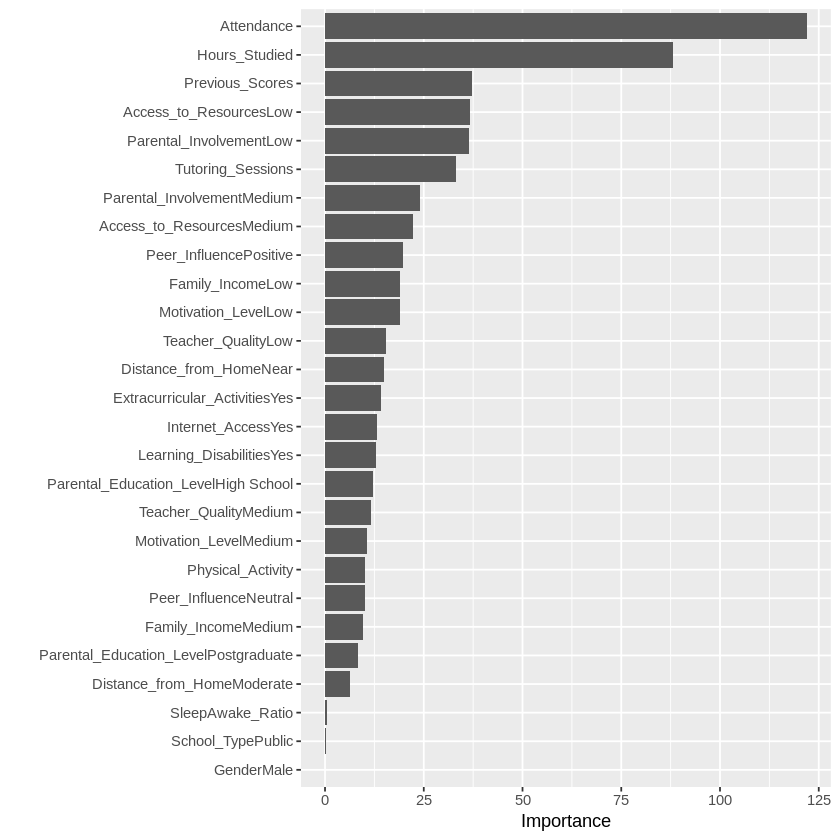

In [ ]:
## Linear regression feature importance
linreg_fit |>
  extract_fit_parsnip() |>
  vip(num_features = 30)

Linear regression model is a model that can predict numeric values from predictors using a linear function. Elastic Net regression extends 
the linear regression by adding both L1 (Lasso) and L2 (Ridge) regularization to improve stability and feature selection.Factor variables with more than two levels requires label encoding to be used for efficient preprocessing. Howerver utilizing one-hot encoding
for such a case does used, not a lot of information is lost
. Thus step_dummy() will be used on all factor variables.

→ A | warning: A correlation computation is required, but `estimate` is constant and has 0
               standard deviation, resulting in a divide by 0 error. `NA` will be returned.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

There were issues with some computations   A: x5

There were issues with some computations   A: x5





Basically we want to choose parameters such that the 'root mean squared error' is lowest. The graph depicts as amount of regularization value increases 
'root mean squared error' value is getting' getting worse

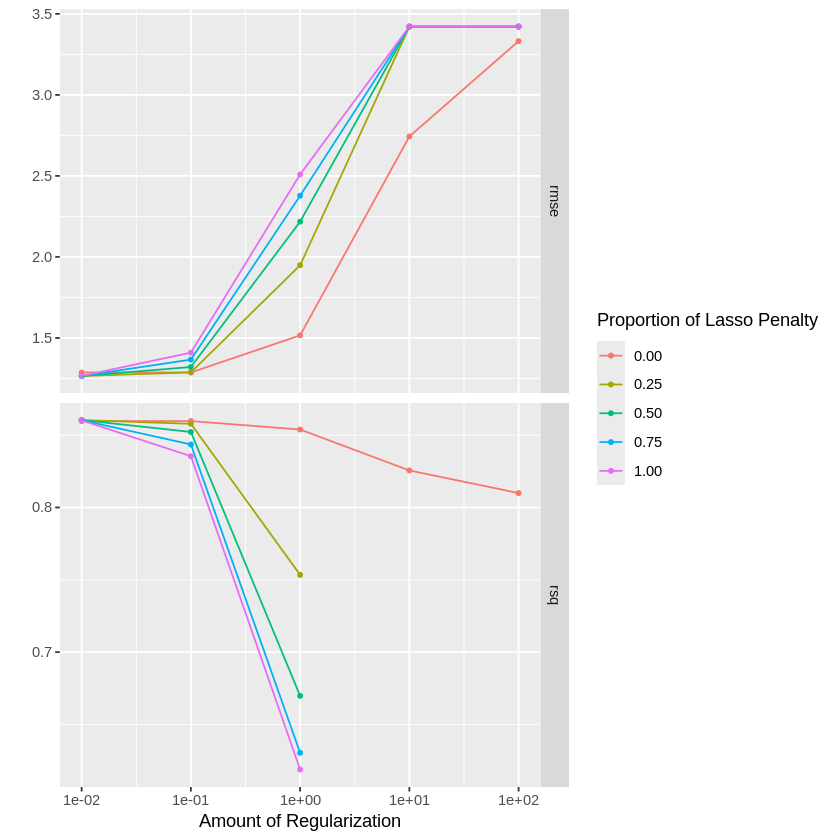

In [ ]:
##
## Elastic Net Regression
##
cat("Linear regression model is a model that can predict numeric values from predictors using a linear function. Elastic Net regression extends \
the linear regression by adding both L1 (Lasso) and L2 (Ridge) regularization to improve stability and feature selection.")

## Layout elastic net recipe
reg_recipe <- recipe(formula = Exam_Score ~ ., data = train) |>
  # to assign an unseen factor  to a new factor in testing.
  #step_novel(all_nominal_predictors()) |>
  step_dummy(all_nominal_predictors())

cat("Factor variables with more than two levels requires label encoding to be used for efficient preprocessing. Howerver utilizing one-hot encoding\
for such a case does used, not a lot of information is lost
. Thus step_dummy() will be used on all factor variables.")

## Set up the elastic net specification
elastic_net_spec <-
  linear_reg(penalty = tune(), mixture = tune()) |>
  set_mode("regression") |>
  set_engine("glmnet")

#?linear_reg
## Build elastic workflow
elastic_net_workflow <- workflow() |>
  add_recipe(reg_recipe) |>
  add_model(elastic_net_spec)

## Construct the grid of parameters
param_grid <- grid_regular(penalty(range = c(-2, 2)), mixture(), levels = 5)

## Tune grid parameters
tune_res <- tune_grid(
  elastic_net_workflow,
  resamples = trainreg_cv,
  grid = param_grid
)

## Show tuned parameters results plot
autoplot(tune_res)

cat("Basically we want to choose parameters such that the 'root mean squared error' is lowest. The graph depicts as amount of regularization value increases \
'root mean squared error' value is getting' getting worse")


In [ ]:

cat("Basically we want to choose parameters such that the 'root mean squared error' is lowest. The graph depicts as amount of regularization value increases \
'root mean squared error' value is getting' getting worse")

## Extract best model
best_penalty <- select_best(tune_res, metric = "rmse")
print(best_penalty)

## Finalize workflow with best parameter
elastic_net_final <- finalize_workflow(elastic_net_workflow, best_penalty)

## Fit elastic net model to train data
elastic_net_final_fit <- fit(elastic_net_final, data = train)

# Show output of model
elastic_net_final_fit |> tidy() |> print(n = Inf)
cat("Seeing the results we interprete a few coefficients as follows: ", '\n',
" A positive coefficient for 'Hours_Studied' means that for an additional hour studied, the predicted outcome increases by 0.262, again indicating quantitative relevance.\
Gender coefficient (0) implies the Gender of a student is quantitatively irrelevant for determining their performance.")

## Make predictions with fitted model
# Training data
elasticnet_aug <- augment(elastic_net_final_fit, new_data = train)

bind_rows(  elasticnet_aug |> rmse(truth = Exam_Score, .pred),
            elasticnet_aug |> rsq(truth = Exam_Score, .pred) )

Basically we want to choose parameters such that the 'root mean squared error' is lowest. The graph depicts as amount of regularization value increases 
'root mean squared error' value is getting' getting worse# A tibble: 1 × 3
  penalty mixture .config              
    <dbl>   <dbl> <chr>                
1    0.01    0.25 Preprocessor1_Model06
# A tibble: 28 × 3
   term                                  estimate penalty
   <chr>                                    <dbl>   <dbl>
 1 (Intercept)                           42.4        0.01
 2 Hours_Studied                          0.262      0.01
 3 Attendance                             0.196      0.01
 4 Previous_Scores                        0.0478     0.01
 5 Tutoring_Sessions                      0.494      0.01
 6 Physical_Activity                      0.179      0.01
 7 SleepAwake_Ratio                       0.0500     0.01
 8 Parental_Involvement_Low              -1.95       0.01
 9 Parental_Involvement_Medium           -1.02       

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.2700117
rsq,standard,0.8622275


In [ ]:
##
## Random Forest Model
##
cat("A ranom forest is an emsemble model that creates a  large number of decision trees, each independent of the others. The final prediction uses all predictions from the \
individual trees, and reports an average for regression models, a mode value for classification mdoels", "\n")

cat("tuning rf paramters was computtationally expensive, so I settled for base model")

## Set up the elastic net specification
rf_regtree_spec <- rand_forest() |>
                   set_engine("randomForest", importance = TRUE ) |>
                   set_mode("regression")

## Fit model
set.seed(1)
rf_regtree_fit <- fit(rf_regtree_spec, Exam_Score ~ ., train )
rf_regtree_fit

## Make predictions with fitted model
# Training data
rf_regtree_aug <- augment(rf_regtree_fit, new_data = train)

bind_rows( rf_regtree_aug|> rmse(truth = Exam_Score, .pred),
           rf_regtree_aug |> rsq(truth = Exam_Score, .pred) )

cat("Training metrics for RF are great much better than two previous model in terms of rmse and r-squared. \
However, test metrics will be more meaningful")

A ranom forest is an emsemble model that creates a  large number of decision trees, each independent of the others. The final prediction uses all predictions from the 
individual trees, and reports an average for regression models, a mode value for classification mdoels 
tuning rf paramters was computtationally expensive, so I settled for base model

parsnip model object


Call:
 randomForest(x = maybe_data_frame(x), y = y, importance = ~TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 6

          Mean of squared residuals: 2.35767
                    % Var explained: 79.86

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.7471323
rsq,standard,0.9647602


Training metrics for RF are great much better than two previous model in terms of rmse and r-squared. 
However, test metrics will be more meaningful

In [ ]:
##
## Extreme Gradient Boosting (XGB) regression model
##
cat("An XGB Model creates a series of decision trees forming an ensemble. Each tree depends on the results of the previuos tree. All trees in the ensemble are combined\
to produce a final prediction. Below a regression model is set up with two paramters to tune namely: tree_dpth and learn_rate")


## Set up the XGB reg specification
xgbregtree_spec <- boost_tree( tree_depth = tune(), learn_rate = tune()) |>
                   set_engine("xgboost") |>
                   set_mode("regression")

## Layout XGB reg recipe
xgbreg_recipe <- recipe(formula = Exam_Score ~ ., data = train) |>
                 step_novel(all_nominal_predictors()) |>
                 step_normalize(all_numeric_predictors()) |>
                 step_dummy(all_nominal_predictors()) #|>


## Build elastic workflow
xgbreg_wf <- workflow() |>
  add_model(xgbregtree_spec) |>
  add_recipe(xgbreg_recipe)


An XGB Model creates a series of decision trees forming an ensemble. Each tree depends on the results of the previuos tree. All trees in the ensemble are combined
to produce a final prediction. Below a regression model is set up with two paramters to tune namely: tree_dpth and learn_rate

In [ ]:

# Create grid of parameters
set.seed(1)


cat('While a wider parameter grid gives a better chance of obtaining best param. Leaving size of 60 would be ideal, as described in literature.')
xgbparam_grid <- grid_random( tree_depth(range = c(3, 10)),
                              learn_rate(c(0.01, 0.3), trans = NULL), size = 60)

# show a few
xgbparam_grid |> print(n = 5)

tune_res <- tune_grid(xgbreg_wf, resamples = trainreg_cv, grid = xgbparam_grid)

# Select best param
xgbbest_params <- select_best(tune_res, metric = 'rmse')
xgbbest_params

# Finalize workflow
xgbreg_final <- finalize_workflow(xgbreg_wf, xgbbest_params)

# Fit model to data
xgbregfinal_fit <- fit(xgbreg_final, data = train )

## Make predictions with fitted model
# Training data
xgbreg_aug <- augment(xgbregfinal_fit, new_data = train)
bind_rows( xgbreg_aug |> rmse(truth = Exam_Score, .pred),
           xgbreg_aug |> rsq(truth = Exam_Score, .pred) )


#?boost_tree
#?decision_tree
#?randomForest

While a wider parameter grid gives a better chance of obtaining best param. Leaving size of 60 would be ideal, as described in literature.# A tibble: 60 × 2
  tree_depth learn_rate
       <int>      <dbl>
1          3     0.275 
2          6     0.0951
3          9     0.143 
4          3     0.106 
5          4     0.199 
# ℹ 55 more rows


tree_depth,learn_rate,.config
<int>,<dbl>,<chr>
8,0.2930895,Preprocessor1_Model51


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.0454589
rsq,standard,0.9279164


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.2528712
rsq,standard,0.8638779


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.2525029
rsq,standard,0.8637286


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.4311991
rsq,standard,0.8466983


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.4467571
rsq,standard,0.8347104


Best model in terms of rmse is Linear model and Elastic Net We look at feature importance and the predictions plot below, for only the best regression modelWe see from top to bottom the most important features for predicting the final score of a student according to the linear model. 
The predictors: Attendance, Hourse Studied, Previuos score, appearing as the most important and 'Gender' having the least importance. 
Gender essentially playing no role in predicting final score

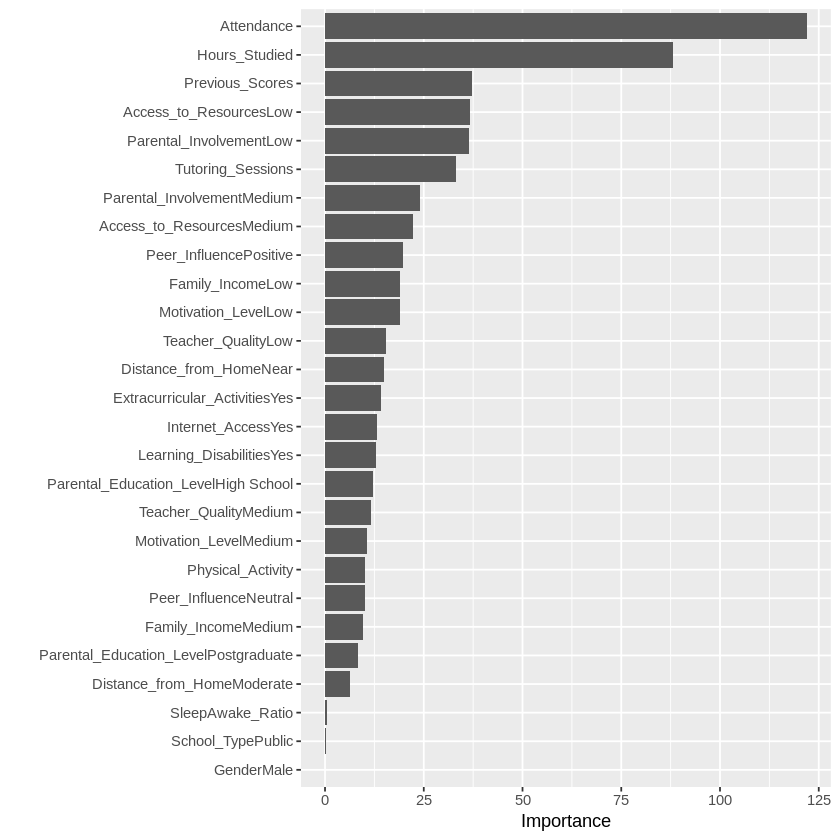

For accurate prediction, points are suppose to strictly appear on the 45 degree line. The graph depicts otherwise, and further shows the model 
shortcomings with some observations: as we noticed points do not exactly appear on the line. However, the outliers are not too many as there only exist four down east and two top center of the graph.

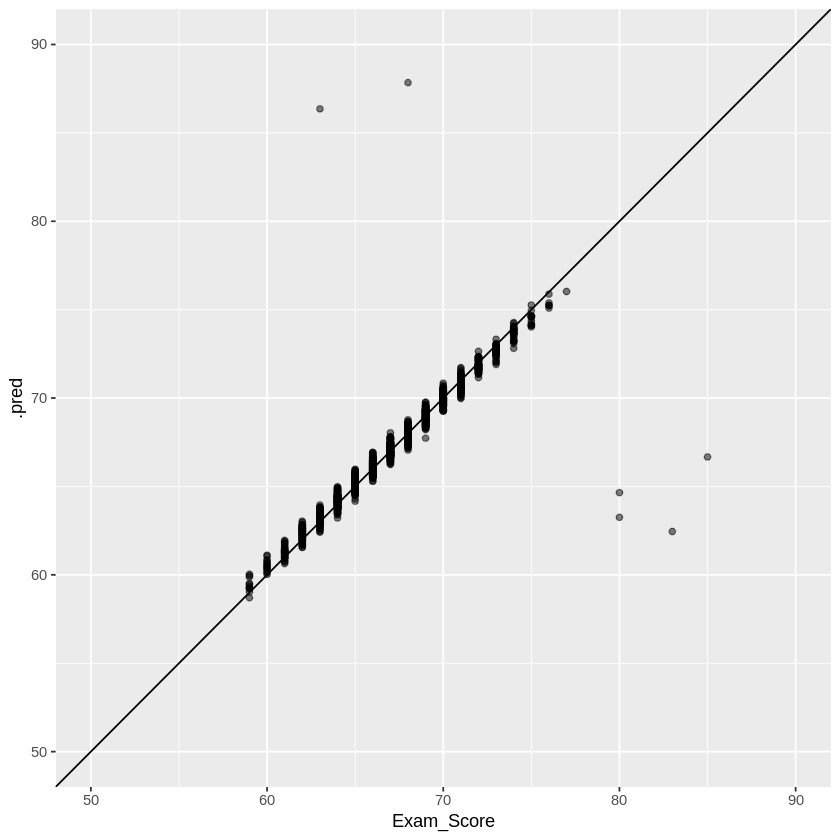

In [ ]:

#####################********************####################*******************
#*******************************************************************************
####
#### Model Performance Evaluation
#### A --> Regression Model

# Test results: Linear regression
linreg_aug <- augment(linreg_fit, new_data = test)
bind_rows( linreg_aug |> rmse(truth = Exam_Score, .pred),
           linreg_aug |> rsq(truth = Exam_Score, .pred) )

# Test results: Elastic net regression
elasticnet_aug <- augment(elastic_net_final_fit, new_data = test)
bind_rows(  elasticnet_aug |> rmse(truth = Exam_Score, .pred),
            elasticnet_aug |> rsq(truth = Exam_Score, .pred))

# Test results: RF
rf_regtree_aug <- augment(rf_regtree_fit, new_data = test)
bind_rows( rf_regtree_aug|> rmse(truth = Exam_Score, .pred),
           rf_regtree_aug |> rsq(truth = Exam_Score, .pred))

# Test results: XBG
xgbreg_aug <- augment(xgbregfinal_fit, new_data = test)
bind_rows( xgbreg_aug |> rmse(truth = Exam_Score, .pred),
           xgbreg_aug |> rsq(truth = Exam_Score, .pred))

cat("Best model in terms of rmse is Linear model and Elastic Net ")


## Feature importance and prediction plot of best model only
cat("We look at feature importance and the predictions plot below, for only the best regression model")

# Feature importance
linreg_fit  |> extract_fit_parsnip() |>
               vip(num_features = 30)
cat("We see from top to bottom the most important features for predicting the final score of a student according to the linear model. \
The predictors: Attendance, Hourse Studied, Previuos score, appearing as the most important and 'Gender' having the least importance. \
Gender essentially playing no role in predicting final score")

# Plot
linreg_aug |>
  ggplot(aes(x = Exam_Score, y = .pred))+
  geom_abline()+
  geom_point(alpha = 0.5) +
  ylim(50, 90) +
  xlim(50, 90)

cat("For accurate prediction, points are suppose to strictly appear on the 45 degree line. The graph depicts otherwise, and further shows the model \
shortcomings with some observations: as we noticed points do not exactly appear on the line. However, the outliers are not too many as there only exist four down east and two top center of the graph.")

In [ ]:
#####################********************####################*******************
#*******************************************************************************
####
#### MODELLING
####*
#### B -> Classification Models
####*
## Models Considered: Logistic Regression and Extreme Gradient Boosting Model
#*******************************************************************************
#*******************************************************************************


summary(data$Exam_Score)
cat("The maximum attainable score is 100, I believe. As seen with the summary of target variable - Exam_Score, the worst score recorded in our current data is", min(data$Exam_Score),". Therefore, we are \
dealing with a perfromance data set of brilliant students (that is like good and very good sets of students). Students whom all are expected to have a pass grade." , '\n', "
This task can also be addressed as a classification problem, whereby we want to predict a student's final Exam grade, scoring between good or very good. ")


## Compute median
med = median( data$Exam_Score)
cat("The median value:", med ,  "is used as boundary to separate class between 'very good' and 'good' ")

# Transform "Exam_Score" to binary class: 'very good' and 'good'
data_class  <- data |>
               mutate( Exam_Score = factor( ifelse(Exam_Score > med, 'v_good', 'good')))

summary(data_class)

## Split data


## 'Strata' for data split to obtain similar proportion of target variable - Exam_Score, in training set as well as test set.
set.seed(1)
data_split <- initial_split(data_class, prop = 3/4, strata = 'Exam_Score')

train_class <- training(data_split)
test_class <- testing(data_split)


# Declare recipe
class_recipe <- recipe(Exam_Score ~., data = train_class)

##
## Logistic Regression
##
cat("Logistic Regression is a generalized linear model for modelling the relationship between predictors and targets of binanry nature. A linear combination of the predictors \
is used to model the log odds of an event (target).")

## Set up logistic regression specification
logreg_spec <- logistic_reg() |>
               set_engine("glm") |>
               set_mode("classification")

## Build workflow
logreg_wrkflow <- workflow() |>
                  add_model(logreg_spec) |>
                  add_recipe(class_recipe)

## Fit model to data
logreg_fit <- logreg_wrkflow |> fit(data = train_class)

## Extract coefficients
logreg_fit |> extract_fit_parsnip() |> tidy() |> print(n = Inf)
cat("Negative coefficients mean lower probability of very good performance.
Positive coefficients mean higher probability  of very good performance.")

## Make predictions with fitted model
# Test data
logreg_aug <- augment(logreg_fit, new_data = test_class)

bind_rows(logreg_aug |> accuracy(truth = Exam_Score, .pred_class),
          logreg_aug |> roc_auc(truth = Exam_Score, .pred_good) )
logreg_aug |> conf_mat(truth = Exam_Score, .pred_class)

cat(" 97.9% accuracy is pretty good for accuracy.
The roc value will imply the roc curve will almost hug the extreme end, further indicating implying the base model log reg model \
is 99.2% accurate in terms of distinguishing the classes and also acuurate in predicting the right class between a good and very good grade")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  59.00   65.00   67.00   67.17   69.00   86.00 

The maximum attainable score is 100, I believe. As seen with the summary of target variable - Exam_Score, the worst score recorded in our current data is 59 . Therefore, we are 
dealing with a perfromance data set of brilliant students (that is like good and very good sets of students). Students whom all are expected to have a pass grade. 
 
This task can also be addressed as a classification problem, whereby we want to predict a student's final Exam grade, scoring between good or very good. The median value: 67 is used as boundary to separate class between 'very good' and 'good' 

  Exam_Score   Hours_Studied     Attendance     Parental_Involvement
 good  :3400   Min.   :  1.0   Min.   : 60.00   High  :1799         
 v_good:2859   1st Qu.: 16.0   1st Qu.: 70.00   Low   :1259         
               Median : 20.0   Median : 80.00   Medium:3201         
               Mean   : 20.1   Mean   : 80.07                       
               3rd Qu.: 24.0   3rd Qu.: 90.00                       
               Max.   :100.0   Max.   :100.00                       
 Access_to_Resources Extracurricular_Activities Previous_Scores 
 High  :1870         No :2521                   Min.   : 50.00  
 Low   :1247         Yes:3738                   1st Qu.: 63.00  
 Medium:3142                                    Median : 75.00  
                                                Mean   : 75.07  
                                                3rd Qu.: 88.00  
                                                Max.   :100.00  
 Motivation_Level Internet_Access Tutoring_Sessions Family_Inc

Logistic Regression is a generalized linear model for modelling the relationship between predictors and targets of binanry nature. A linear combination of the predictors 
is used to model the log odds of an event (target).

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


# A tibble: 28 × 5
   term                                 estimate std.error statistic   p.value
   <chr>                                   <dbl>     <dbl>     <dbl>     <dbl>
 1 (Intercept)                          -69.3      2.84     -24.4    5.60e-131
 2 Hours_Studied                          0.740    0.0316    23.4    1.39e-121
 3 Attendance                             0.533    0.0214    24.9    2.74e-137
 4 Parental_InvolvementLow               -5.09     0.290    -17.6    3.24e- 69
 5 Parental_InvolvementMedium            -2.56     0.192    -13.3    1.62e- 40
 6 Access_to_ResourcesLow                -5.40     0.296    -18.3    2.06e- 74
 7 Access_to_ResourcesMedium             -2.68     0.193    -13.9    9.50e- 44
 8 Extracurricular_ActivitiesYes          1.23     0.155      7.98   1.51e- 15
 9 Previous_Scores                        0.131    0.00706   18.6    7.40e- 77
10 Motivation_LevelLow                   -2.61     0.232    -11.3    1.93e- 29
11 Motivation_LevelMedium        

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9789137
roc_auc,binary,0.9923406


          Truth
Prediction good v_good
    good    836     19
    v_good   14    696

 97.9% accuracy is pretty good for accuracy.
The roc value will imply the roc curve will almost hug the extreme end, further indicating implying the base model log reg model 
is 99.2% accurate in terms of distinguishing the classes and also acuurate in predicting the right class between a good and very good grade

In [ ]:
##
## XGB classificaction
##

## Set up extreme gradient boosting model specification
xgbclasstree_spec <- boost_tree( tree_depth = tune(), learn_rate = tune()) |>
                     set_engine("xgboost") |>
                     set_mode("classification")
## Create recipe
class_recipe <- recipe(Exam_Score ~., data = train_class) |>
  step_dummy(all_nominal_predictors())

## Build workflow
xgbclass_wf <- workflow() |>
               add_model(xgbclasstree_spec) |>
               add_recipe(class_recipe)

## Create grid of parameters
set.seed(1)
xgbparam_grid <- grid_random( tree_depth(range = c(6, 9)),
                 learn_rate(c(0.1, 0.35), trans = NULL), size = 60)

trainclass_cv <- vfold_cv(train_class)

## Tune params
tune_res <- tune_grid(xgbclass_wf, resamples = trainclass_cv, grid = xgbparam_grid)

## Extract best params
best_params <- select_best(tune_res, metric = 'accuracy')
best_params

## Finanlize workflow
xgbclass_final <- finalize_workflow(xgbclass_wf, best_params)

## Fit model
xgbclassfinal_fit <- fit(xgbclass_final, data = train_class )


## Make predictions with fitted model
# Test data
xgbclass_aug <- augment(xgbclassfinal_fit, new_data = test_class)
bind_rows( xgbclass_aug |> accuracy(truth = Exam_Score, .pred_class),
           xgbclass_aug |> roc_auc(truth = Exam_Score, .pred_good) )
xgbclass_aug |> conf_mat(truth = Exam_Score, .pred_class)

cat("Although recording a very good accuracy and roc score, the tuned XGB performs less better than logistic regression\
Also, accounting for more false positive and false negative classification than logistic regression. Therefore logistic regression is more suitable here. \
Maybe a more fine-tuned model may be better. ")

tree_depth,learn_rate,.config
<int>,<dbl>,<chr>
7,0.3440427,Preprocessor1_Model51


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9041534
roc_auc,binary,0.9686154


          Truth
Prediction good v_good
    good    777     77
    v_good   73    638

Although recording a very good accuracy and roc score, the tuned XGB performs less better than logistic regression
Also, accounting for more false positive and false negative classification than logistic regression. Therefore logistic regression is more suitable here. 
Maybe a more fine-tuned model may be better. 